# Conjunto de dados de 50 mil músicas - gerado por IA
Um conjunto de dados fictício para análise criativa de tendências musicais e popularidade da música!

## Sobre o conjunto de dados
Este conjunto de dados contém informações fictícias sobre 50.000 músicas de vários gêneros musicais. Inclui recursos como popularidade da música, contagem de streams, duração, artistas, álbuns e idiomas. O conjunto de dados é gerado pelo ChatGPT e não contém dados reais. Ele pode ser usado para fins criativos e educacionais, como análise musical, previsão de tendências e estudos de popularidade de músicas.

- song_id: O identificador exclusivo da música.
- song_title: O título da música.
- artista: O artista que executa a música.
- álbum: O álbum onde a música é apresentada.
- gênero: O gênero musical da música.
- release_date: A data de lançamento da música.
- duração: A duração da música (em segundos).
- popularidade: A pontuação de popularidade da música (1-100).
- riacho: O número total de streams da música.
- Idioma: A linguagem da música.
- explicit_content: Se a música contém conteúdo explícito (por exemplo, linguagem imprópria).
- etiqueta: A gravadora que publicou a música.
- compositor: O compositor da música.
- produtor: O produtor da música.
- colaboração: Se a música é uma colaboração com outros artistas.

Você pode encontrar os dados na Kaggle

````
URL: https://www.kaggle.com/datasets/refiaozturk/spotify-songs-dataset?resource=download
````

# Análise de Dados de Músicas do Spotify

Este notebook realiza uma análise exploratória de um conjunto de dados de músicas do Spotify com base no conjunto de dados de 50 mil músicas - gerado por IA na Kaggle:

````
URL: https://www.kaggle.com/datasets/refiaozturk/spotify-songs-dataset?resource=download
````

### 1. Tratamento de Dados Ausentes

Para garantir a qualidade da análise, os dados ausentes foram tratados da seguinte forma:
- **Duração da Música (`duration`):** Os valores ausentes foram preenchidos com a mediana.
- **Idioma (`language`):** Os valores em branco foram preenchidos com o idioma mais comum (moda).
- **Colaboração (`collaboration`):** Foi criada uma nova coluna `has_collaboration` para indicar se uma música é uma colaboração (`True`) ou não (`False`).

### 2. Análise de Dados Categóricos

Esta análise nos ajuda a entender a composição do conjunto de dados. Os resultados da execução do código mostrarão:
- Os 10 gêneros musicais mais comuns.
- Os 10 artistas com mais músicas no dataset.
- A distribuição de músicas por idioma.
- A distribuição de músicas com e sem conteúdo explícito.
- A distribuição de músicas com e sem colaboração.

### 3. Análise de Dados Numéricos

Esta seção explora as características das variáveis numéricas e suas relações. Serão gerados:
- **Histogramas:** Para visualizar a distribuição da duração, popularidade e streams.
- **Mapa de Calor de Correlação:** Para visualizar a relação linear entre duração, popularidade e streams.

### 4. Análise Temporal (por Ano de Lançamento)

Análise de tendências ao longo dos anos. Serão gerados gráficos para mostrar:
- O número de músicas lançadas por ano.
- A tendência da popularidade média das músicas ao longo dos anos.

In [12]:
# Célula 1: Imports e Carregamento de Dados

# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Defina o caminho para o arquivo que você gostaria de carregar
file_path = "spotify_songs_dataset.csv"

# Carregue a versão mais recente
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "refiaozturk/spotify-songs-dataset",
  file_path,
  # Forneça quaisquer argumentos adicionais como
  # sql_query ou pandas_kwargs. Veja a
  # documentação para mais informações:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("Primeiros 5 registros:", df.head())

/tmp/ipython-input-2000222297.py:14: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


Primeiros 5 registros:   song_id               song_title             artist              album  \
0  SP0001  Space executive series.       Sydney Clark              What.   
1  SP0002     Price last painting.  Connor Peters DDS   Nature politics.   
2  SP0003                   Piece.         Anna Keith             Visit.   
3  SP0004     Power industry your.    Zachary Simpson  Behavior evening.   
4  SP0005      Food animal second.  Christopher Mcgee             Front.   

        genre release_date  duration  popularity    stream language  \
0  Electronic   1997-11-08     282.0          42  35055874  English   
1  Electronic   2015-05-10     127.0          50   9249527  English   
2         Pop   2024-07-08       NaN          10  76669110  English   
3     Hip-Hop   2022-08-15     214.0          86  34732016  English   
4         Pop   2023-03-05     273.0          63  96649372  English   

  explicit_content            label       composer           producer  \
0              Yes  

In [6]:
# Célula 2: Tratamento de Dados Ausentes

print("\n" + "="*50 + "\n")
print("--- Tratamento de Dados Ausentes ---")
# Preenchendo 'duration' com a mediana
median_duration = df['duration'].median()
df['duration'].fillna(median_duration, inplace=True)

# Preenchendo 'language' com a moda (idioma mais frequente)
mode_language = df['language'].mode()[0]
df['language'].fillna(mode_language, inplace=True)

# Criando a coluna 'has_collaboration'
df['has_collaboration'] = df['collaboration'].notna()

print("Valores ausentes após o tratamento:")
print(df.isnull().sum())



--- Tratamento de Dados Ausentes ---
Valores ausentes após o tratamento:
song_id                  0
song_title               0
artist                   0
album                    0
genre                    0
release_date             0
duration                 0
popularity               0
stream                   0
language                 0
explicit_content         0
label                    0
composer                 0
producer                 0
collaboration        35000
has_collaboration        0
dtype: int64


/tmp/ipython-input-3719964550.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['duration'].fillna(median_duration, inplace=True)
/tmp/ipython-input-3719964550.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [8]:
# Célula 3: Análise de Dados Categóricos
print("\n" + "="*50 + "\n")
print("--- Análise de Dados Categóricos ---")
top_10_genres = df['genre'].value_counts().nlargest(10)
top_10_artists = df['artist'].value_counts().nlargest(10)
language_distribution = df['language'].value_counts()
explicit_distribution = df['explicit_content'].value_counts()
collaboration_distribution = df['has_collaboration'].value_counts()

print("\nTop 10 Gêneros Musicais:")
print(top_10_genres)
print("\nTop 10 Artistas com Mais Músicas:")
print(top_10_artists)
print("\nDistribuição de Idiomas:")
print(language_distribution)
print("\nDistribuição de Conteúdo Explícito:")
print(explicit_distribution)
print("\nDistribuição de Colaborações:")
print(collaboration_distribution)




--- Análise de Dados Categóricos ---

Top 10 Gêneros Musicais:
genre
Electronic    12568
Pop           12534
Hip-Hop       12298
Folk           2559
Classical      2542
Country        2511
Jazz           2504
R&B            1513
Reggae          971
Name: count, dtype: int64

Top 10 Artistas com Mais Músicas:
artist
Michael Smith          23
Michael Johnson        20
John Smith             20
David Jones            19
Christopher Johnson    17
David Johnson          16
Robert Williams        16
Amanda Smith           15
Christopher Smith      15
David Smith            15
Name: count, dtype: int64

Distribuição de Idiomas:
language
English     35799
Spanish      4725
French       2419
Korean       2328
Italian      1902
Japanese     1417
German       1410
Name: count, dtype: int64

Distribuição de Conteúdo Explícito:
explicit_content
Yes    25083
No     24917
Name: count, dtype: int64

Distribuição de Colaborações:
has_collaboration
False    35000
True     15000
Name: count, dtype: int



--- Gerando Gráficos de Distribuição Numérica ---
Salvo: numeric_distributions.png


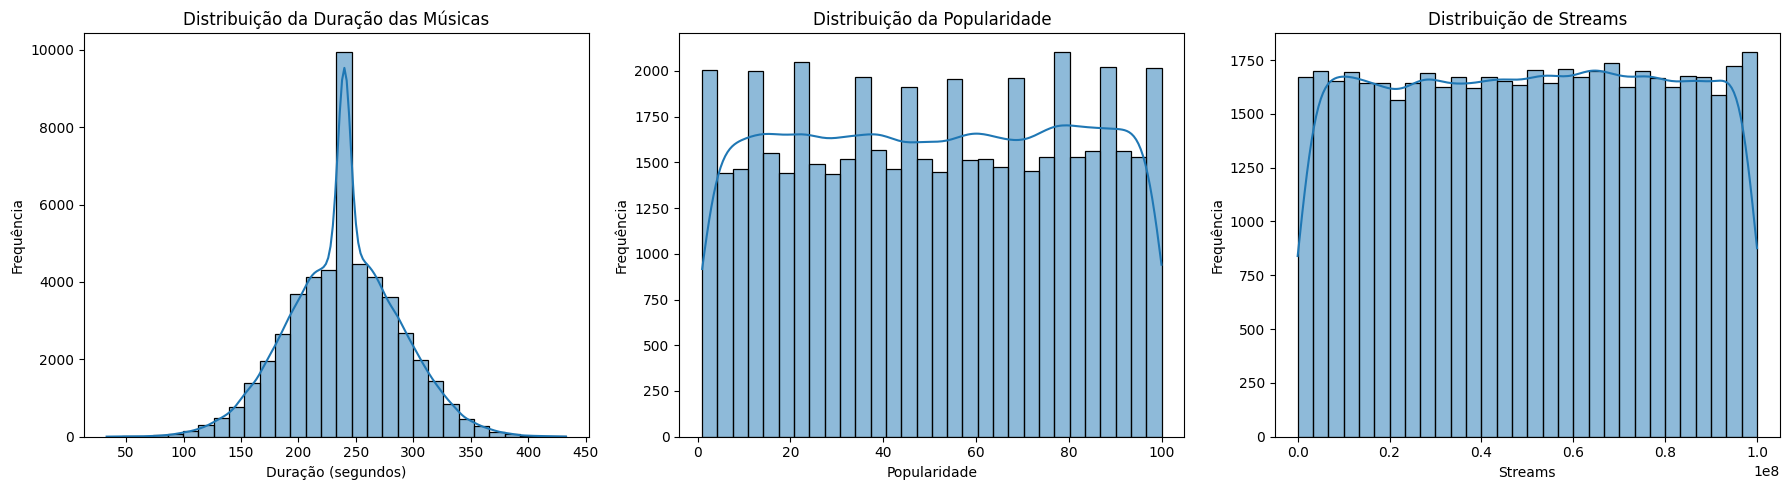

In [9]:
# Célula 4: Análise de Dados Numéricos - Distribuições

print("\n" + "="*50 + "\n")
print("--- Gerando Gráficos de Distribuição Numérica ---")
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['duration'], kde=True, bins=30)
plt.title('Distribuição da Duração das Músicas')
plt.xlabel('Duração (segundos)')
plt.ylabel('Frequência')

plt.subplot(1, 3, 2)
sns.histplot(df['popularity'], kde=True, bins=30)
plt.title('Distribuição da Popularidade')
plt.xlabel('Popularidade')
plt.ylabel('Frequência')

plt.subplot(1, 3, 3)
sns.histplot(df['stream'], kde=True, bins=30)
plt.title('Distribuição de Streams')
plt.xlabel('Streams')
plt.ylabel('Frequência')

plt.tight_layout()
plt.savefig('numeric_distributions.png')
print("Salvo: numeric_distributions.png")



--- Análise de Correlação ---

Matriz de Correlação:
            duration  popularity    stream
duration    1.000000    0.000247  0.000886
popularity  0.000247    1.000000 -0.000579
stream      0.000886   -0.000579  1.000000
Salvo: correlation_heatmap.png


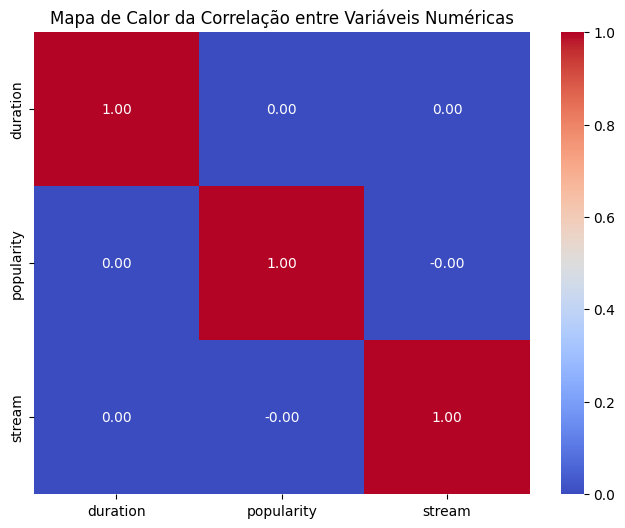

In [10]:
# Célula 5: Análise de Dados Numéricos - Correlação
print("\n" + "="*50 + "\n")
print("--- Análise de Correlação ---")
correlation_matrix = df[['duration', 'popularity', 'stream']].corr()

print("\nMatriz de Correlação:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor da Correlação entre Variáveis Numéricas')
plt.savefig('correlation_heatmap.png')
print("Salvo: correlation_heatmap.png")



--- Análise Temporal ---
Salvo: songs_per_year.png
Salvo: avg_popularity_by_year.png


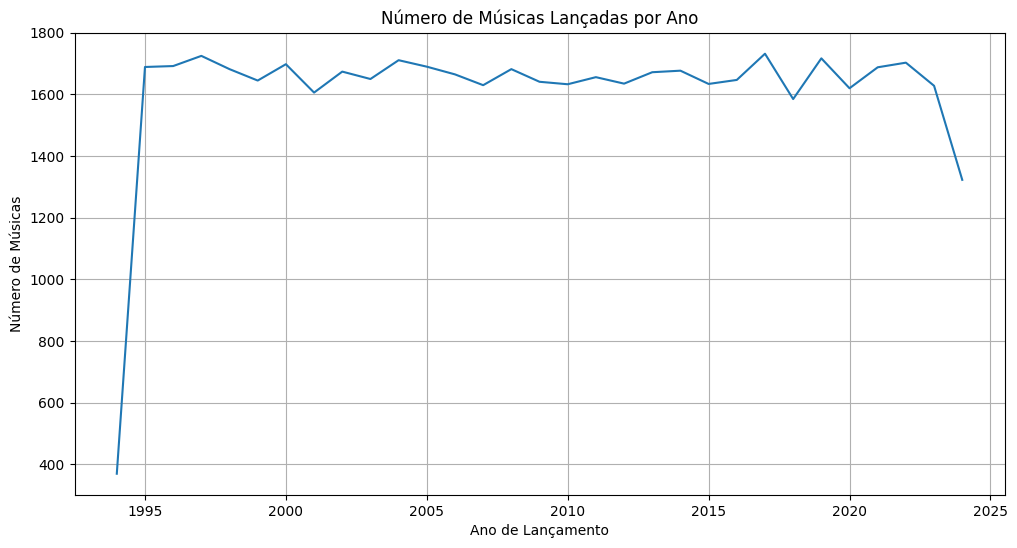

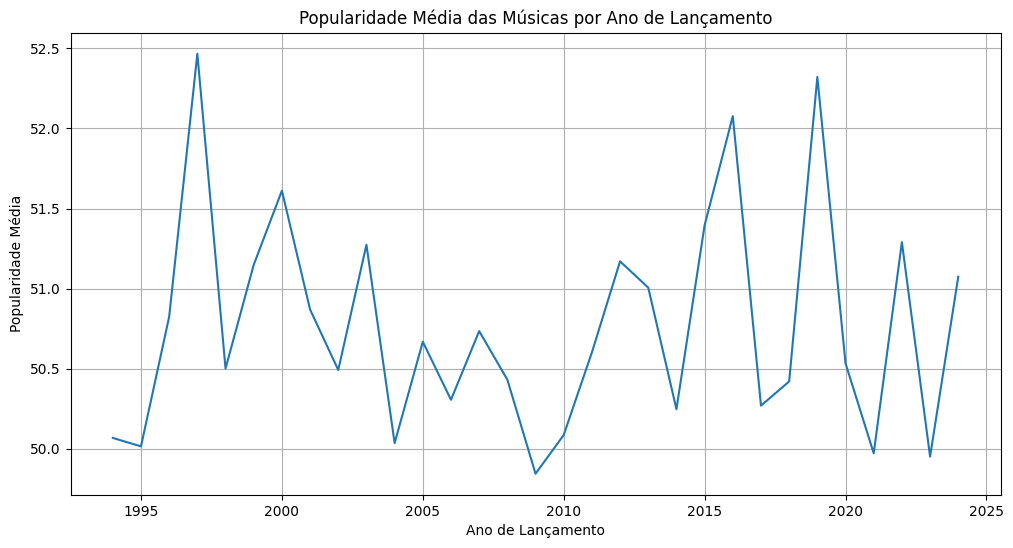

In [11]:
# Célula 6: Análise Temporal
print("\n" + "="*50 + "\n")
print("--- Análise Temporal ---")
# Convertendo 'release_date' para datetime e extraindo o ano
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year

# Número de músicas por ano
songs_per_year = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
songs_per_year.plot(kind='line')
plt.title('Número de Músicas Lançadas por Ano')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Músicas')
plt.grid(True)
plt.savefig('songs_per_year.png')
print("Salvo: songs_per_year.png")

# Popularidade média por ano de lançamento
avg_popularity_by_year = df.groupby('release_year')['popularity'].mean()

plt.figure(figsize=(12, 6))
avg_popularity_by_year.plot(kind='line')
plt.title('Popularidade Média das Músicas por Ano de Lançamento')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Popularidade Média')
plt.grid(True)
plt.savefig('avg_popularity_by_year.png')
print("Salvo: avg_popularity_by_year.png")